In [39]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from meus.printer import *
import statsmodels.api as sm
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

data = str(datetime.now().year)+'-'+str(datetime.now().month)+'-'+str(datetime.now().day)
data

'2020-4-10'

In [40]:
os.chdir('D:\\OneDrive\\Programação\\python\\covid\\data\\results')
directory = os.listdir('..')
printLis(directory)

-------------
-=< Lista >=-
-------------
0 -> caso-full.csv
1 -> cities.csv
2 -> covid19_municipios.csv
3 -> COVID19_REGIOES BR.csv
4 -> Dados_demográficos_municípios.xlsx
5 -> Datalab_COVID.pptx
6 -> figures
7 -> População residente municipal x população faixa etária.csv
8 -> População residente por estado - 2015.csv
9 -> População residente x sexo.csv
10 -> results


In [41]:
date = 0
df_cov =  pd.read_csv('..\\'+directory[date])
df_cov.head()

,city,city_ibge_code,date,estimated_population_2019,is_repeated,is_last,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,12252023.0,False,False,1,0.00816,2020-02-25,NaN,NaN,city,SP,0,0
1,São Paulo,3550308.0,2020-02-26,12252023.0,True,False,1,0.00816,2020-02-25,NaN,NaN,city,SP,0,0
2,São Paulo,3550308.0,2020-02-27,12252023.0,False,False,1,0.00816,2020-02-27,NaN,NaN,city,SP,0,0
3,São Paulo,3550308.0,2020-02-28,12252023.0,False,False,2,0.01632,2020-02-28,NaN,NaN,city,SP,1,0
4,São Paulo,3550308.0,2020-02-29,12252023.0,False,False,2,0.01632,2020-02-29,NaN,NaN,city,SP,0,0


In [42]:
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10251 entries, 0 to 10250
Data columns (total 15 columns):
city                                             10251 non-null object
city_ibge_code                                   9973 non-null float64
date                                             10251 non-null object
estimated_population_2019                        9973 non-null float64
is_repeated                                      10251 non-null bool
is_last                                          10251 non-null bool
last_available_confirmed                         10251 non-null int64
last_available_confirmed_per_100k_inhabitants    9843 non-null float64
last_available_date                              10251 non-null object
last_available_death_rate                        1480 non-null float64
last_available_deaths                            9843 non-null float64
place_type                                       10251 non-null object
state                                       

In [43]:
df_cov['date'] = pd.to_datetime(df_cov['date'])
df_cov.head()

,city,city_ibge_code,date,estimated_population_2019,is_repeated,is_last,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,12252023.0,False,False,1,0.00816,2020-02-25,NaN,NaN,city,SP,0,0
1,São Paulo,3550308.0,2020-02-26,12252023.0,True,False,1,0.00816,2020-02-25,NaN,NaN,city,SP,0,0
2,São Paulo,3550308.0,2020-02-27,12252023.0,False,False,1,0.00816,2020-02-27,NaN,NaN,city,SP,0,0
3,São Paulo,3550308.0,2020-02-28,12252023.0,False,False,2,0.01632,2020-02-28,NaN,NaN,city,SP,1,0
4,São Paulo,3550308.0,2020-02-29,12252023.0,False,False,2,0.01632,2020-02-29,NaN,NaN,city,SP,0,0


In [45]:
df_cov = df_cov[['last_available_confirmed', 'last_available_deaths', 'last_available_confirmed_per_100k_inhabitants', 'date']]
group = df_cov.groupby('date')
df = pd.DataFrame()
df['Confirmed'] = group.sum()['last_available_confirmed']
df['Deaths'] = group.sum()['last_available_deaths']
df['Confirmed/100k'] = group.sum()['last_available_confirmed_per_100k_inhabitants']
df.index.name = 'Date'
df.head()

,Confirmed,Deaths,Confirmed/100k
Date,,,
2020-02-25,1,0.0,0.00816
2020-02-26,1,0.0,0.00816
2020-02-27,1,0.0,0.00816
2020-02-28,2,0.0,0.01632
2020-02-29,2,0.0,0.01632


In [46]:
df.tail()

,Confirmed,Deaths,Confirmed/100k
Date,,,
2020-04-06,12263,570.0,4770.13436
2020-04-07,14084,691.0,5807.61493
2020-04-08,16052,809.0,6515.27627
2020-04-09,17922,942.0,7632.18966
2020-04-10,18214,967.0,7899.65467


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46 entries, 2020-02-25 to 2020-04-10
Data columns (total 3 columns):
Confirmed         46 non-null int64
Deaths            46 non-null float64
Confirmed/100k    46 non-null float64
dtypes: float64(2), int64(1)
memory usage: 1.4 KB


In [49]:
g = 1
campo = 'Confirmed'
print_campo = 's'
figsize=(30, 5)
first = '2020-' + str(df.tail(1).index.month[0] - 1) + '-' + str(df.tail(1).index.day[0])
last = '2020-' + str(df.tail(1).index.month[0] + 1) + '-' + str(df.tail(1).index.day[0])
start = '2020-' + str(df.head(1).index.month[0]) + '-' + str(df.head(1).index.day[0])
end = '2020-' + str(df.tail(1).index.month[0]) + '-' + str(df.tail(1).index.day[0])
try:
    os.mkdir('\\ts')
    print('Directory created')
except FileExistsError:
    print('Directory already exists')

Directory created


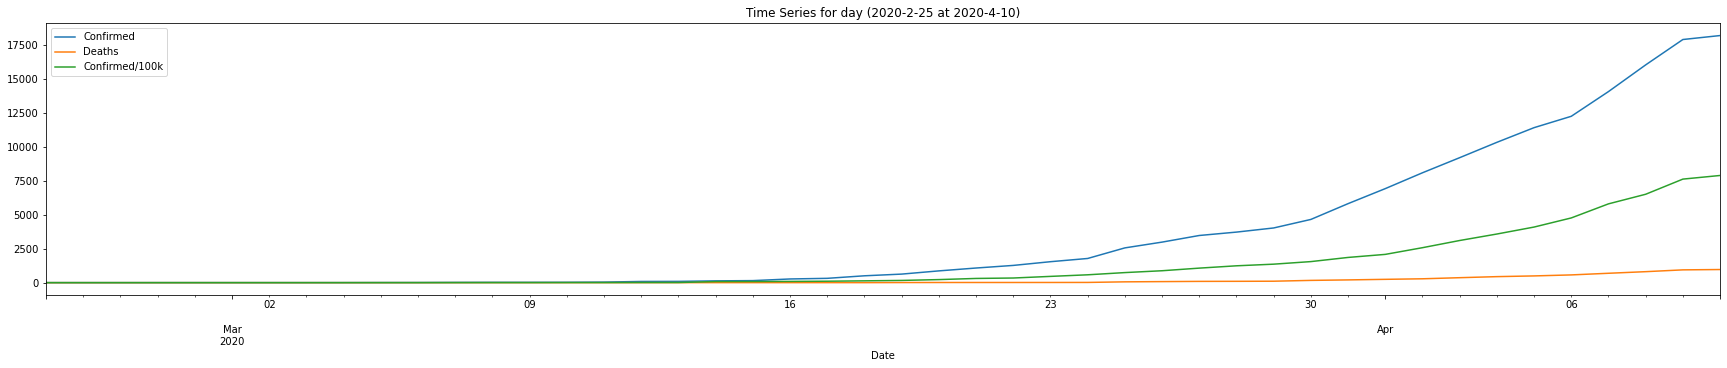

In [52]:
df.plot(figsize=figsize)
plt.title('Time Series for day ('+str(start)+' at '+str(end)+')')
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png', dpi=150)

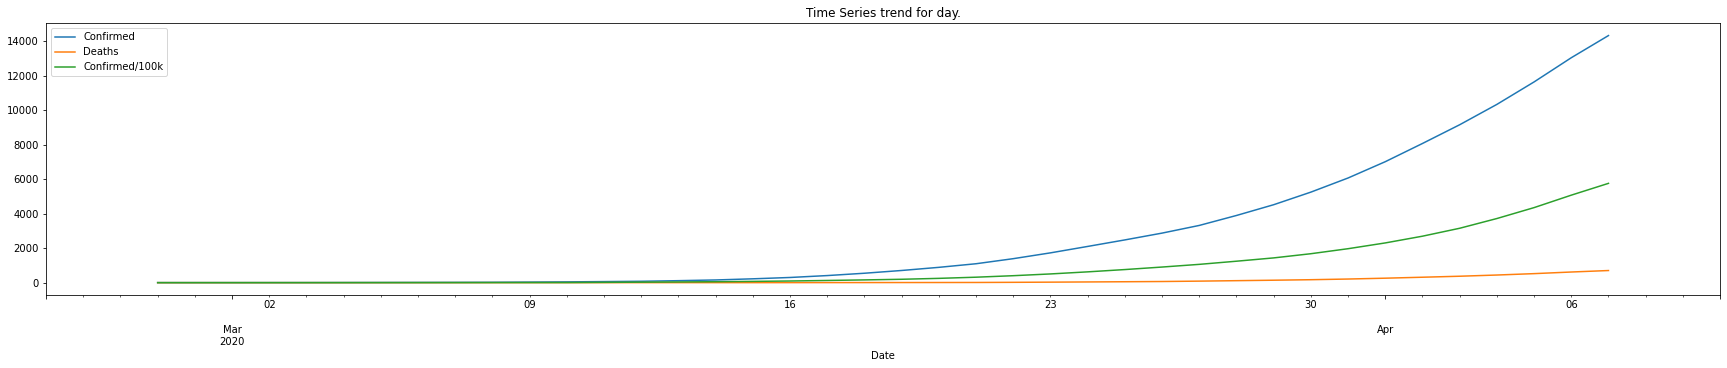

In [54]:
dec = seasonal_decompose(df)
dec.trend.plot(figsize=figsize)
plt.title('Time Series trend for day.')
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png', dpi=150)

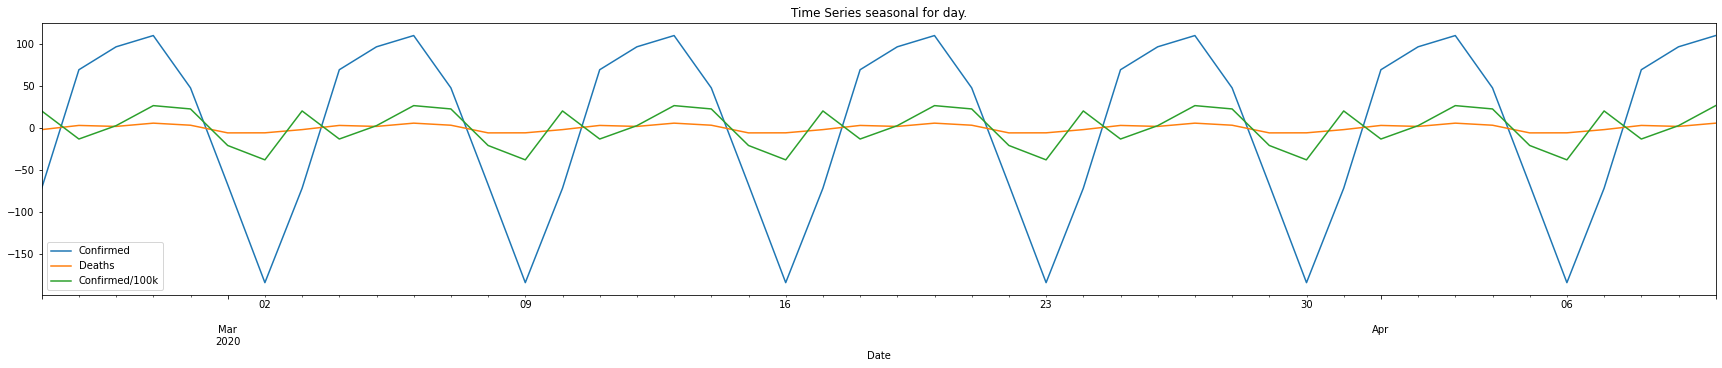

In [55]:
dec.seasonal.plot(figsize=figsize)
plt.title('Time Series seasonal for day.')
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png', dpi=150)

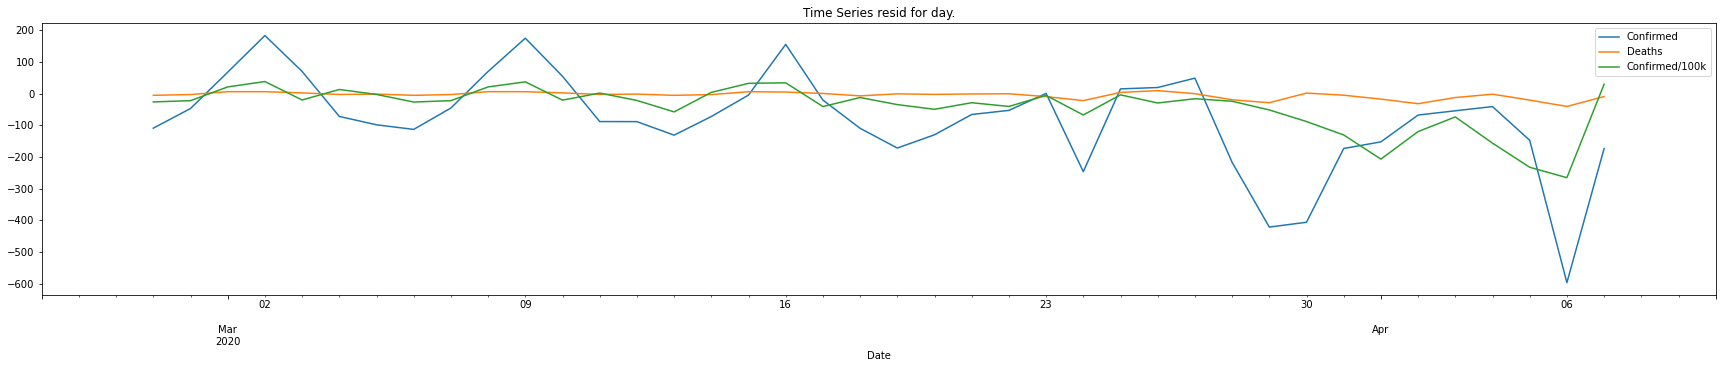

In [56]:
dec.resid.plot(figsize=figsize)
plt.title('Time Series resid for day.')
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png', dpi=150)

In [57]:
for p in range(3):
    for q in range(3):
        for d in range(3):
            test = (p, q, d)
            modelo = ARIMA(df[campo], order=test, freq='D')
            try:
                results = modelo.fit()
                print(f'({p}, {q}, {d})')
                print(results.summary().tables[1])
                print()
            except: 
                print('Não')

(0, 0, 0)
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3493.6087    770.813      4.532      0.000    1982.843    5004.374

(0, 0, 1)
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3599.3000    796.559      4.519      0.000    2038.074    5160.526
ma.L1.Confirmed     1.0000      0.058     17.377      0.000       0.887       1.113

Não
(0, 1, 0)


C:\Users\gfsil\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        404.7333     82.118      4.929      0.000     243.784     565.682

(0, 1, 1)
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               388.6586     98.772      3.935      0.000     195.069     582.248
ma.L1.D.Confirmed     0.7041      0.112      6.309      0.000       0.485       0.923



C:\Users\gfsil\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\gfsil\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\gfsil\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\gfsil\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


(0, 1, 2)
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               380.6790    117.200      3.248      0.002     150.971     610.387
ma.L1.D.Confirmed     0.9026      0.074     12.236      0.000       0.758       1.047
ma.L2.D.Confirmed     1.0000        nan        nan        nan         nan         nan

(0, 2, 0)
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6364     48.194      0.138      0.891     -87.823     101.095

(0, 2, 1)
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 30.3484     14.898      2.037      0.048       1.149      59.548
ma.L1.D2.Confirmed    -0.7032      0.122

C:\Users\gfsil\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(2, 0, 0)
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.606e+04        nan        nan        nan         nan         nan
ar.L1.Confirmed     1.8762      0.052     36.257      0.000       1.775       1.978
ar.L2.Confirmed    -0.8772      0.052    -16.844      0.000      -0.979      -0.775



C:\Users\gfsil\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\gfsil\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\gfsil\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:649: RuntimeWarning: invalid value encountered in double_scalars
  (1-a**2)
C:\Users\gfsil\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:651: RuntimeWarning: divide by zero encountered in arctanh
  invarcoefs = 2*np.arctanh(params)


(2, 0, 1)
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             2.83e+04        nan        nan        nan         nan         nan
ar.L1.Confirmed     1.8595      0.053     35.248      0.000       1.756       1.963
ar.L2.Confirmed    -0.8604      0.053    -16.262      0.000      -0.964      -0.757
ma.L1.Confirmed     0.0767      0.182      0.421      0.676      -0.280       0.434

Não
(2, 1, 0)
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               349.6968    214.203      1.633      0.110     -70.133     769.527
ar.L1.D.Confirmed     0.9414      0.206      4.562      0.000       0.537       1.346
ar.L2.D.Confirmed    -0.1393      0.224     -0.622      0.537      -0.578       0.299

(2, 1, 1)
                        coef  

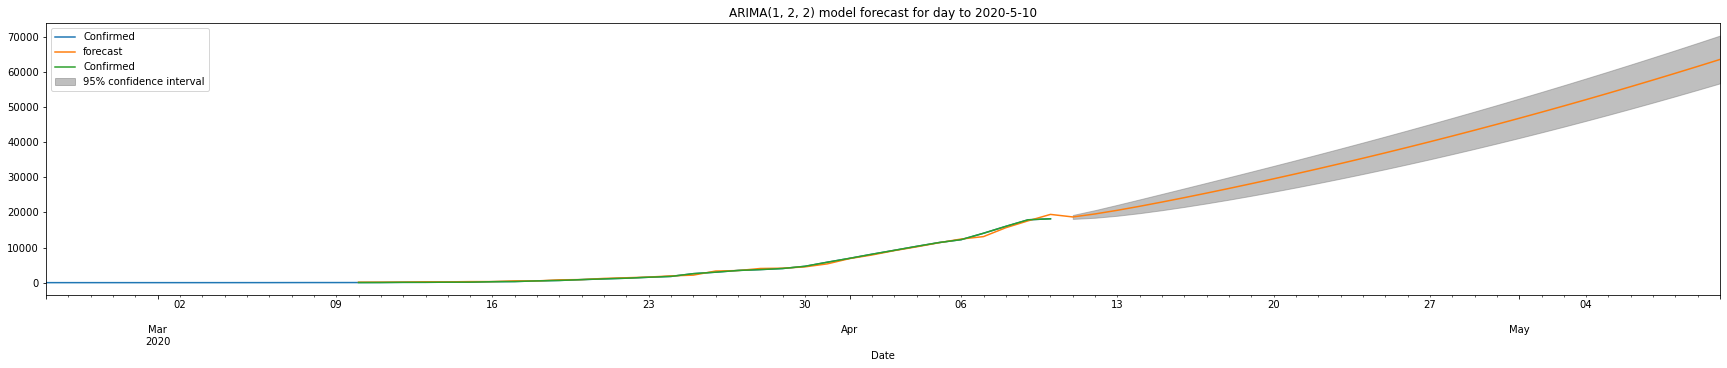

In [64]:
test = (1,2,2)
modelo = ARIMA(df[campo], order=test, freq='D')
results = modelo.fit()
plt.figure(figsize=figsize)
results.plot_predict(
   first, last,
    ax = df['Confirmed'].plot(),
    plot_insample=True,
)
plt.title('ARIMA'+str(test)+' model forecast for day to ' + last)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png', dpi=150)

In [65]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D2.Confirmed   No. Observations:                   44
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -312.661
Method:                       css-mle   S.D. of innovations            286.208
Date:                Fri, 10 Apr 2020   AIC                            635.322
Time:                        18:55:23   BIC                            644.243
Sample:                    02-27-2020   HQIC                           638.630
                         - 04-10-2020                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 29.5716      7.363      4.016      0.000      15.140      44.003
ar.L1.D2.Confirmed     0.4863      0.213      2.288      0.027       0.070       0.903
ma.L1.D2.Confirmed    -0.8264      0.224     -3.689      0.001      -1.266      -0.387
ma.L2.D2.Confirmed    -0.1736      0.208     -0.834      0.409      -0.581       0.234
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.0562           +0.0000j            2.0562            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -5.7616           +0.0000j            5.7616            0.5000
-----------------------------------------------------------------------------
"""

In [66]:
pred = results.forecast(steps=30)
pred

(array([18732.05122667, 19591.3017474 , 20631.68060106, 21775.33902594,
        22984.41612805, 24240.49867556, 25534.63159452, 26862.45968263,
        28221.86483487, 29611.81693403, 31031.81499386, 32481.61536519,
        33961.09955189, 35470.20992467, 37008.91845617, 38577.21151557,
        40175.08247368, 41802.52810646, 43459.54684594, 45146.13792955,
        46862.30098643, 48608.0358362 , 50383.34239116, 52188.22060863,
        54022.67046787, 55886.69195879, 57780.28507649, 59703.44981856,
        61656.18618386, 63638.49417183]),
 array([ 286.20775641,  554.62885164,  793.11083891, 1001.54116317,
        1184.98615715, 1348.62719281, 1496.67721432, 1632.34206923,
        1758.01708887, 1875.49455169, 1986.12977803, 2090.96298157,
        2190.80579218, 2286.30210456, 2377.97095446, 2466.23698301,
        2551.45234079, 2633.91265566, 2713.86884439, 2791.53597928,
        2867.10004027, 2940.72312764, 3012.54753849, 3082.69899305,
        3151.28921671, 3218.4180276 , 3284.175

In [67]:
import warnings
import itertools
warnings.filterwarnings("ignore")

In [68]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
y = df[campo]
aic_list = list()
param_list = list()
param_s_list = list()
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            results = sm.tsa.statespace.SARIMAX(
                            y,
                            order=param,
                            seasonal_order=param_seasonal,
                            enforce_stationarity=False,
                            enforce_invertibility=False
            ).fit()
            print(f'ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}')
            param_list.append(param)
            param_s_list.append(param_seasonal)
            aic_list.append(results.aic)
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:917.8773249294063
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1208.2734013213665
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:670.223637224541
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:603.2920578583961
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1046.690059899189
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:399.718129249861
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:901.6532006560594
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:626.7806762700448
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:577.9359050938259
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2698.2006125757475
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:385.93598632423226
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:702.2599059829187
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1377.7400335432421
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:506.9715138063582
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:503.2798066490189
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1423.1298327296527
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:332.94787154275946
ARIMA(0, 1, 1)x(0, 0

In [69]:
best = aic_list.index(min(aic_list))
mod = sm.tsa.statespace.SARIMAX(
                                y,
                                order=param_list[best],
                                seasonal_order=param_s_list[best],
                                enforce_stationarity=False,
                                enforce_invertibility=False
)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9402      0.081     11.610      0.000       0.781       1.099
ar.S.L12      -1.8987      0.529     -3.588      0.000      -2.936      -0.862
sigma2       1.72e+05      6e+04      2.868      0.004    5.45e+04     2.9e+05


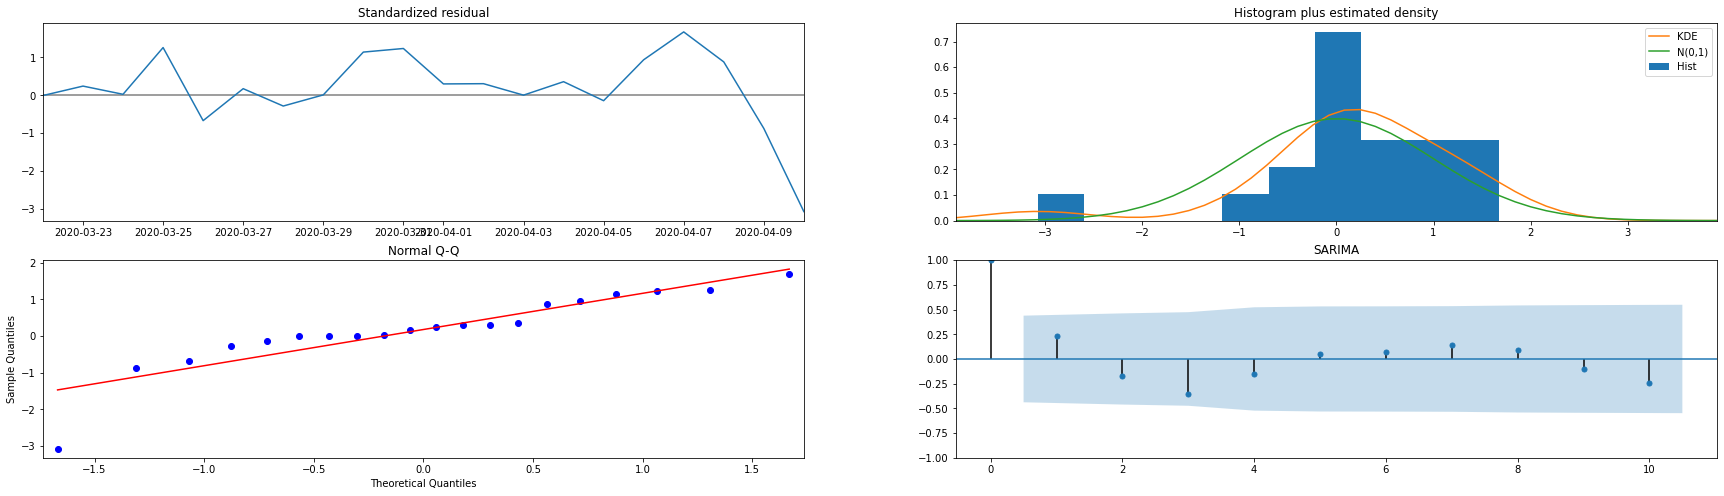

In [71]:
results.plot_diagnostics(figsize=(30, 8))
plt.title('SARIMA')
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png', dpi=150)

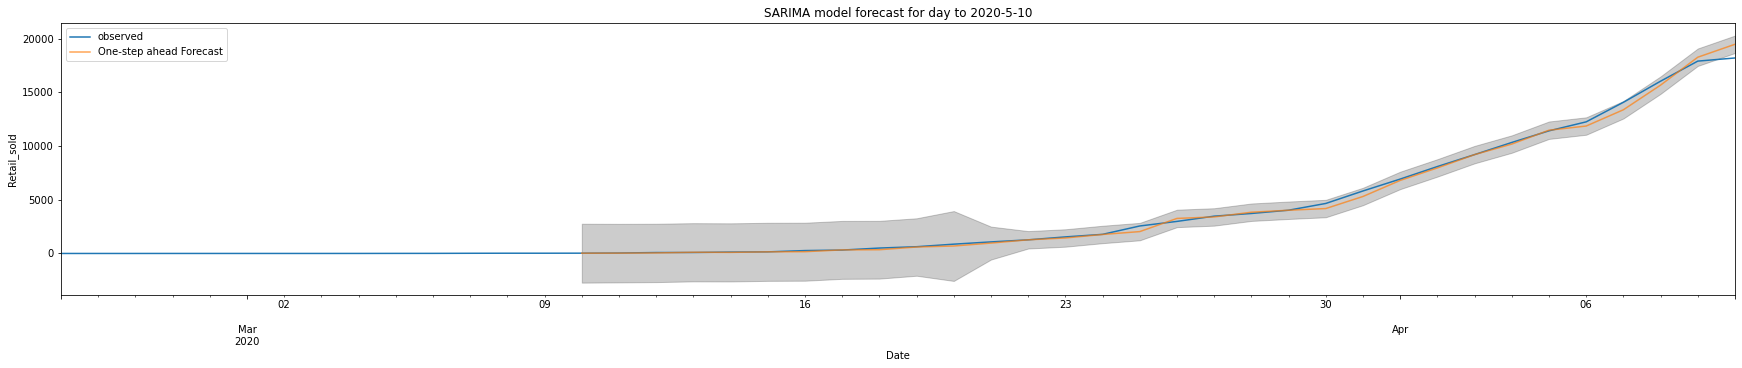

In [72]:
pred = results.get_prediction(start=pd.to_datetime(first), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=figsize)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Retail_sold')
plt.legend()
plt.title('SARIMA model forecast for day to ' + last)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png', dpi=150)

In [73]:
y_forecasted = pred.predicted_mean
y_truth = y[first:]
mse = ((y_forecasted - y_truth) ** 2).mean()
print(f'The Mean Squared Error is {round(mse, 2)}')
print(f'The Root Mean Squared Error is {round(np.sqrt(mse), 2)}')

The Mean Squared Error is 110612.14
The Root Mean Squared Error is 332.58


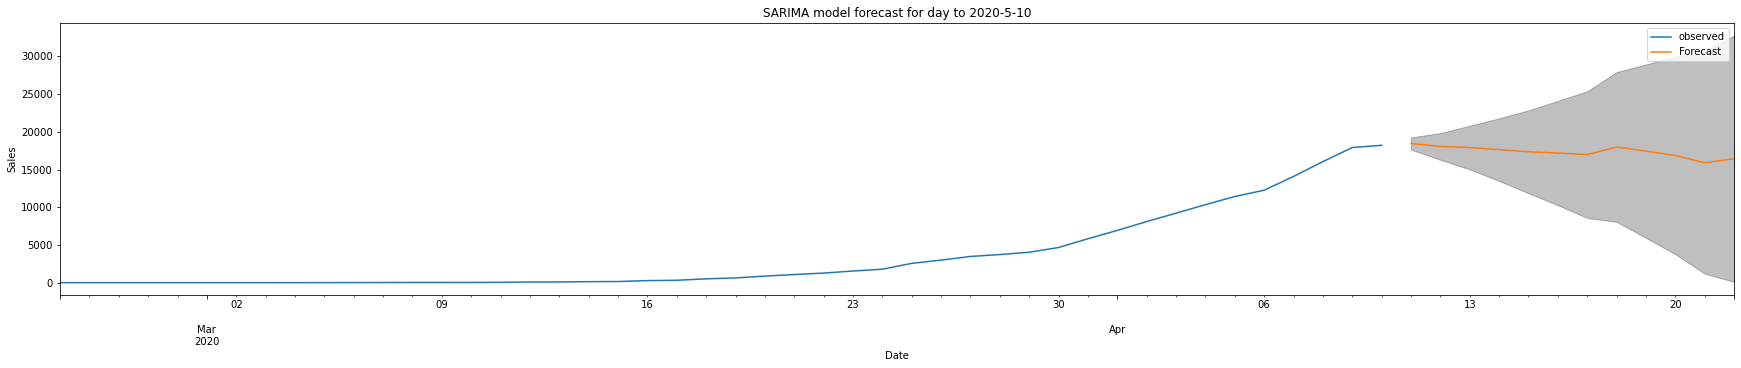

In [74]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=figsize)
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.title('SARIMA model forecast for day to ' + last)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png', dpi=150)

In [75]:
y_forecasted = pred.predicted_mean
y_forecasted.head()

2020-03-10     26.093714
2020-03-11     32.106934
2020-03-12     50.419380
2020-03-13    111.751181
2020-03-14    100.749992
Freq: D, dtype: float64